In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import re

In [2]:
df = pd.read_excel('Tweet_NFT.xlsx')

In [3]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1212763,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(columns =['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'],inplace=True)

In [5]:
df.drop(columns=['id'],inplace=True)

In [6]:
df.dropna(axis=0,how='any',inplace=True)

In [7]:
df.head()

,tweet_text,tweet_created_at,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [8]:
df['tweet_intent'].unique()

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon'], dtype=object)

In [9]:
df['tweet_intent'].isnull().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96364 entries, 0 to 96363
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_text        96364 non-null  object
 1   tweet_created_at  96364 non-null  object
 2   tweet_intent      96364 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


In [11]:
df.shape

(96364, 3)

In [12]:
df.duplicated().sum()

60

In [13]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [14]:
df['tweet_intent'].value_counts()

Community         41461
Giveaway          21039
Appreciation      16448
Whitelist          8320
Presale            5107
Done               3043
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

### Text preprocessing

In [15]:
#removal of url

new_tweet_text = df['tweet_text'][0]
print(new_tweet_text)

def remove_https(row):
    return re.sub(r'http\S+', '', row)

remove_https(new_tweet_text)

@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. 
â€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a
 @Chihuahua_bsc
TG: https://t.co/wqSzCivfaM


"@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. \nâ€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a\n @Chihuahua_bsc\nTG: "

In [16]:
df['new_tweet_text'] = df['tweet_text'].apply(remove_https)

In [17]:
#removal of username

new_tweet_text1 = df['new_tweet_text'][0]
print(new_tweet_text1)

def remove_username(row):
    return re.sub(r'@\S+', '', row)

remove_username(new_tweet_text1)

@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. 
â€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a
 @Chihuahua_bsc
TG: 


"              ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. \nâ€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a\n \nTG: "

In [18]:
df['new_tweet_text1'] = df['new_tweet_text'].apply(remove_username)

In [19]:
#removal of hashtag

new_tweet_text2 = df['new_tweet_text1'][0]
print(new_tweet_text2)

def remove_hashtag(row):
    return re.sub(r'#(\w+)', '', row)

remove_hashtag(new_tweet_text2)

              ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. 
â€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a
 
TG: 


"              ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. \nâ€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a\n \nTG: "

In [20]:
df['new_tweet_text2'] = df['new_tweet_text'].apply(remove_hashtag)

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
import string

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(new_tweet_text2):
    new_tweet_text2 = new_tweet_text2.lower()
    new_tweet_text2 = nltk.word_tokenize(new_tweet_text2)
    
    y = []
    for i in new_tweet_text2:
        if i.isalnum():
            y.append(i)
    
    new_tweet_text2 = y[:]
    y.clear()
    
    for i in new_tweet_text2:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    new_tweet_text2 = y[:]
    y.clear()
    
    for i in new_tweet_text2:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [24]:
df['transformed_text'] = df['new_tweet_text2'].apply(transform_text)

In [25]:
df['no_of_characters'] = df['tweet_text'].apply(len)

In [26]:
df['no_of_words'] = df['tweet_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df['no_of_sentences'] = df['tweet_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

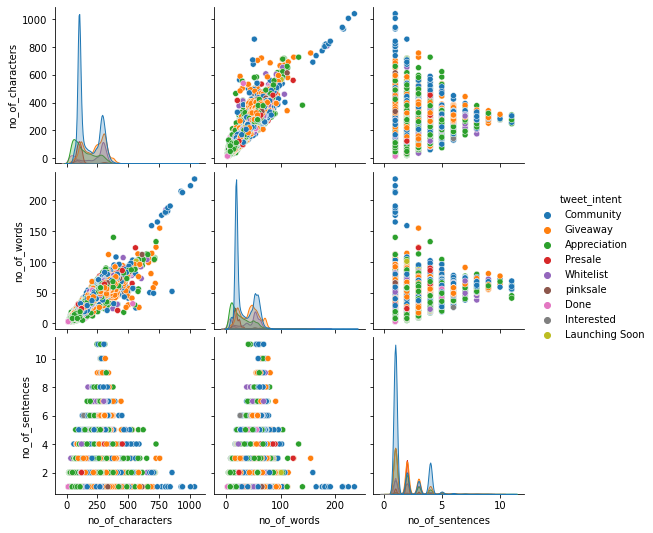

In [28]:
sns.pairplot(df,hue='tweet_intent')

In [29]:
df.drop(columns=['new_tweet_text','new_tweet_text1','new_tweet_text2'],inplace=True)

In [30]:
df.head()

,tweet_text,tweet_created_at,tweet_intent,transformed_text,no_of_characters,no_of_words,no_of_sentences
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community,ecology1990 moonrunnersnft itsukinft thelittle...,483,71,3
1,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway,need sick charact scrimfind blazedrt smallstre...,300,50,1
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation,inagotchinft tesla killabearsnft elonmusk grea...,95,19,2
3,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community,cryptobatznft darekbtw first project crypto mo...,284,53,4
4,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community,sashadysonn first project crypto move earn big...,272,51,4


### Model building

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [32]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [33]:
X.shape

(96304, 3000)

In [34]:
y = df['tweet_intent'].values

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

In [36]:
from sklearn.svm import SVC

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
ohe.fit(y_train)
transformed_train = ohe.transform(y_train).toarray()
ohe.fit(y_test)
transformed_test = ohe.transform(y_test).toarray()

<AxesSubplot:>

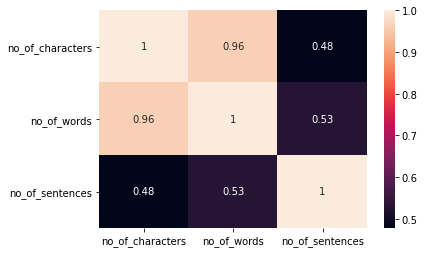

In [39]:
sns.heatmap(df.corr(),annot=True)

It is a popular thought and after a research I found that bayesian algorithms are the best for text data, So I choose Multinomial naive bayes.

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [41]:
multinomial_nb = MultinomialNB()

In [42]:
multinomial_nb.fit(X_train,y_train)
y_pred = multinomial_nb.predict(X_test)
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',average='micro'))
          

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Precision Score :  0.8334140938668143


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Recall Score :  0.8334140938668143


In [43]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8334140938668143
[[ 4169   361    18   325     0     0     5    16     0]
 [  807 10521     6   984     0     0     5    71     0]
 [   66    35   732    68     0     0     1     4     0]
 [  556   383    16  5318     0     0    11    39     2]
 [   41    16     0    23     0     0     0     1     0]
 [    0     4     0     3     0    36     0     0     0]
 [   21    29     0    66     0     0  1439    26     0]
 [  157   250     3   357     0     1    23  1727     1]
 [    0     0     0     1     0     0     0    11   137]]


### Prediction

In [55]:
print(y_pred[15002])

Giveaway
